# Loading the data

data is from https://www.federalreserve.gov/econres/feds/the-us-treasury-yield-curve-1961-to-the-present.htm

## Loading full dataset

In [96]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
import pandas as pd 
from pandas import Series, DataFrame 
from matplotlib import pyplot as plt
import numpy as np

SavePlots = False

In [97]:
import pandas as pd

# Skip the first 9 rows
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Show the first 5 rows of the resulting dataframe
data.head(5)


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
0,1961-06-14,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1,1961-06-15,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
2,1961-06-16,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
3,1961-06-19,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
4,1961-06-20,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99


## Removing non-essential rows and columns

In [98]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# Optional: check the result
data1.head()


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
6145,1985-01-02,11.833172,-4.078431,-617.564405,620.832652,11.1608,12.5602,12.3404,10.1920,11.3976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.183248,2.183435
6146,1985-01-03,11.967238,-4.169920,-617.777654,620.619446,11.1536,12.4338,12.3620,10.2197,11.3545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.181257,2.179797
6147,1985-01-04,12.049434,-4.354115,-617.725058,620.671900,11.2057,12.4703,12.4150,10.2513,11.4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.173992,2.171873
6148,1985-01-07,11.960591,-4.299825,-617.803915,620.593354,11.1201,12.2761,12.2690,10.1968,11.3032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.159062,2.156195
6149,1985-01-08,11.861243,-4.192519,-617.794508,620.602735,11.0820,12.2177,12.1834,10.1686,11.2611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142931,2.140394


In [99]:
# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENY'
sveny_cols = [col for col in data.columns if col.startswith('SVENY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + sveny_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Check the result
data2.head()

# Drop SVENY21 to SVENY30 from data2
columns_to_drop = [f'SVENY{i}' for i in range(21, 31)]
data2 = data2.drop(columns=columns_to_drop, errors='ignore')


In [100]:
data2.shape

(10528, 24)

In [101]:
data2.head()

,Date,BETA0,BETA1,BETA2,SVENY01,SVENY02,SVENY03,SVENY04,SVENY05,SVENY06,...,SVENY11,SVENY12,SVENY13,SVENY14,SVENY15,SVENY16,SVENY17,SVENY18,SVENY19,SVENY20
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


# Data overview

## Plotting variables 

In [102]:
plot_data =data2

# Rename SVENY columns by stripping the prefix
plot_data.rename(columns=lambda col: col[5:] if col.startswith('SVENY') else col, inplace=True)

# Optional: convert new column names from strings like '01' to integers
plot_data.rename(columns=lambda col: str(int(col)) if col.isdigit() else col, inplace=True)

# Check the new column names
print(plot_data.columns)



Index(['Date', 'BETA0', 'BETA1', 'BETA2', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '20'],
      dtype='object')


In [103]:
import matplotlib.pyplot as plt

# Histogram plotting function, you can adjust the bins

def plot_histogram(column_name, bins=30):
    if column_name not in plot_data.columns:
        print(f"Column '{column_name}' not found in data.")
        return

    plt.figure(figsize=(6, 4))
    plt.hist(plot_data[column_name].dropna(), bins=bins, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


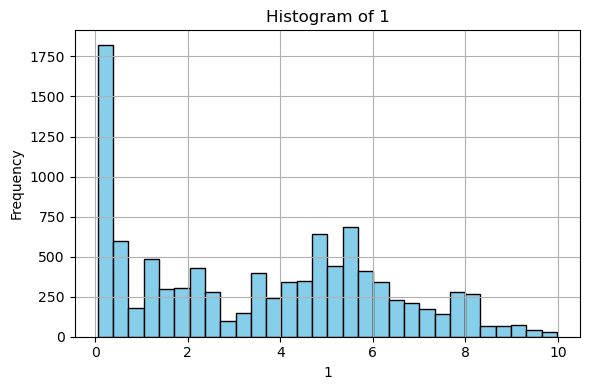

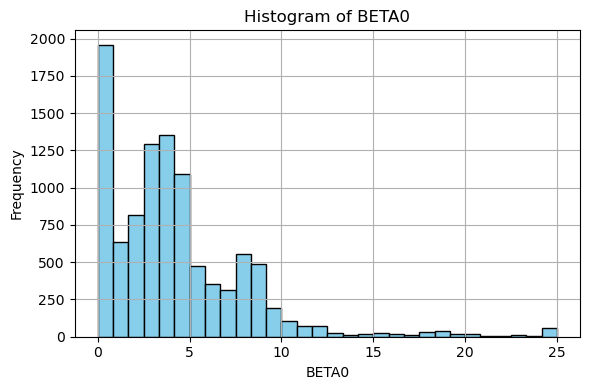

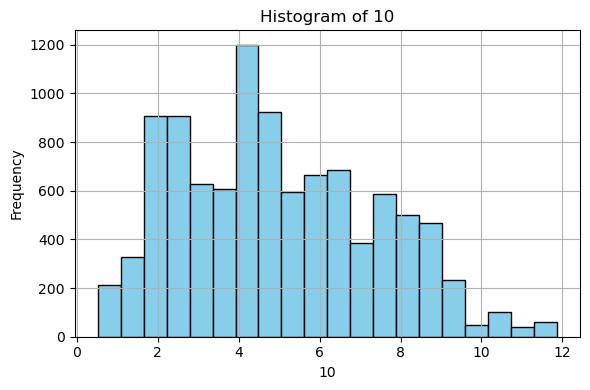

In [104]:
plot_histogram('1')         # Histogram for maturity 1
plot_histogram('BETA0')     # Histogram for BETA0
plot_histogram('10', bins=20)  # Histogram for maturity 10 with 20 bins

## Plotting yield curve for one maturity

In [105]:
plot_data.head(5)

,Date,BETA0,BETA1,BETA2,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.1095,9.9891,10.5626,10.9389,11.1875,11.3533,...,11.6606,11.6812,11.6969,11.7093,11.7193,11.7275,11.7344,11.7404,11.7456,11.7501
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.1550,10.0081,10.5511,10.9024,11.1345,11.2918,...,11.6216,11.6510,11.6756,11.6964,11.7144,11.7301,11.7440,11.7563,11.7673,11.7772
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.1338,10.0223,10.5789,10.9343,11.1668,11.3238,...,11.6588,11.6903,11.7170,11.7399,11.7599,11.7775,11.7932,11.8071,11.8197,11.8310
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.0956,9.9625,10.4947,10.8292,11.0462,11.1927,...,11.5188,11.5522,11.5811,11.6063,11.6285,11.6483,11.6659,11.6818,11.6961,11.7091
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.0827,9.9379,10.4631,10.7929,11.0062,11.1493,...,11.4608,11.4917,11.5183,11.5413,11.5616,11.5795,11.5956,11.6099,11.6229,11.6346


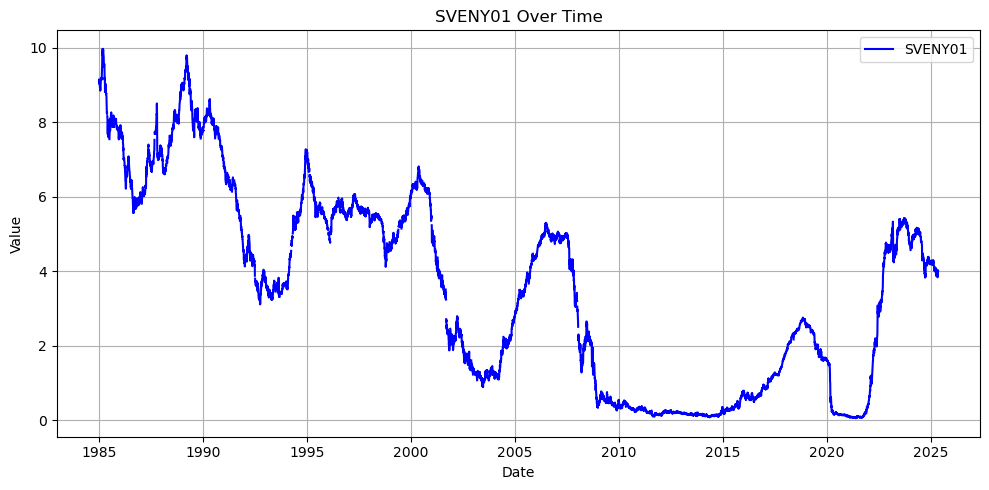

In [106]:
# Plot column '1' against Date
plt.figure(figsize=(10, 5))
plt.plot(plot_data['Date'], plot_data['1'], label='SVENY01', color='blue')

# Formatting the plot
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SVENY01 Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## 3d plot of yield curve

/var/folders/lj/7sv2y2pj44184gp5gwhj9d5w0000gn/T/ipykernel_39254/2336497114.py:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


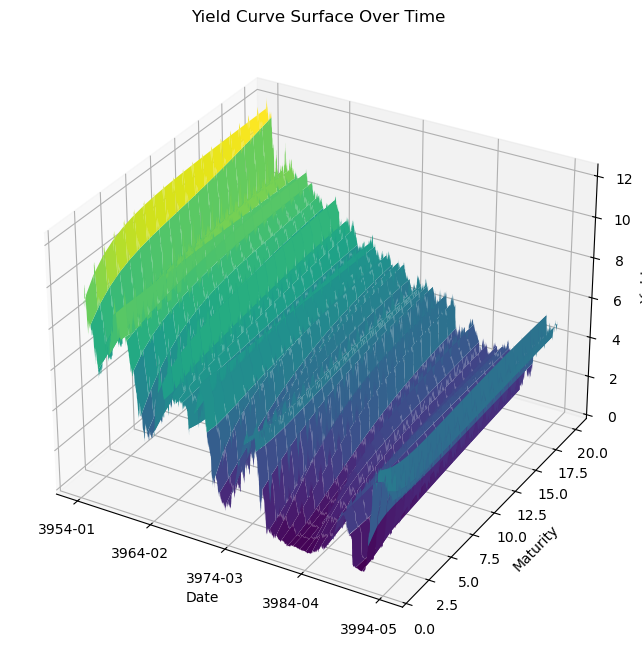

In [107]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Ensure Date is in numeric format for plotting (convert to ordinal)
X = plot_data['Date'].map(pd.Timestamp.toordinal).values  # shape: (n_dates,)

# Get the maturity columns, assume they are all digit strings
maturity_cols = sorted([col for col in plot_data.columns if col.isdigit()], key=lambda x: int(x))
Y = np.array([int(m) for m in maturity_cols])  # shape: (n_maturities,)

# Get Z values (yield values): shape should be (n_dates, n_maturities)
Z = plot_data[maturity_cols].values  # shape: (n_dates, n_maturities)

# Create meshgrid for Date (X) and Maturity (Y)
X_mesh, Y_mesh = np.meshgrid(X, Y, indexing='ij')  # X: dates, Y: maturities

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X_mesh, Y_mesh, Z, cmap='viridis')

# Format axes
ax.set_xlabel('Date')
ax.set_ylabel('Maturity')
ax.set_zlabel('Yield')
ax.set_title('Yield Curve Surface Over Time')

# Optional: Format date ticks
from matplotlib.dates import num2date
ax.set_xticks(np.linspace(X.min(), X.max(), 5))
ax.set_xticklabels([num2date(t).strftime('%Y-%m') for t in np.linspace(X.min(), X.max(), 5)])

plt.tight_layout()
plt.show()

## Preliminary attempt at encoding

Note: Removing all NaN's and including beta's in the encoder

I.e.: this is only to compare and detect weaknessses in the model preliminary to actual fitting

In [108]:
# first guess coder
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare your data
data_clean = data2.dropna().drop(columns=["Date"])  # Drop NaNs and Date
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean)

# Step 2: Define autoencoder architecture
input_dim = X_scaled.shape[1]

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)  # Bottleneck

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Step 3: Train the autoencoder
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - loss: 0.7672 - val_loss: 0.0893
Epoch 2/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.0963 - val_loss: 0.0834
Epoch 3/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0619 - val_loss: 0.0897
Epoch 4/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - loss: 0.0529 - val_loss: 0.0792
Epoch 5/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 0.0220 - val_loss: 0.0716
Epoch 6/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.0182 - val_loss: 0.0708
Epoch 7/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.0166 - val_loss: 0.0665
Epoch 8/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 0.0160 - val_loss: 0.0680
Epoch 9/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0150 - val_loss: 0.0661
Epoch 10/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.0146 - val_loss: 0.0654
Epoch 11/50
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.0140 - val_loss: 0.0623
Epoch 12/50
284/284 ━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [ ]:
#Visualizing training loss
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Attempt to reconstruct

X_reconstructed = autoencoder.predict(X_scaled)

# Compute reconstruction error
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)

# Optional: Flag high-error rows as anomalies
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Inverse transform to original scale
X_reconstructed_original = scaler.inverse_transform(X_reconstructed)

# Step 2: Recreate DataFrame from reconstruction
# Use the same columns that were input to the autoencoder
reconstructed_df = pd.DataFrame(X_reconstructed_original, columns=X.columns)

# Step 3: Extract maturity columns (assumes SVENY01 to SVENY30)
maturity_cols = [col for col in reconstructed_df.columns if col.startswith("SVENY")]
maturity_cols_sorted = sorted(maturity_cols, key=lambda x: int(x.replace("SVENY", "")))

# Step 4: Create meshgrid for plotting
X_time = np.arange(len(reconstructed_df))  # Use row index as time
Y_maturities = np.array([int(col.replace("SVENY", "")) for col in maturity_cols_sorted])
Z_yields = reconstructed_df[maturity_cols_sorted].values

X_mesh, Y_mesh = np.meshgrid(X_time, Y_maturities, indexing='ij')

# Step 5: Plot 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_mesh, Y_mesh, Z_yields, cmap='viridis')

ax.set_xlabel('Time Index')
ax.set_ylabel('Maturity')
ax.set_zlabel('Reconstructed Yield')
ax.set_title('Reconstructed Yield Curve Surface')

plt.tight_layout()
plt.show()

# PCA constructing Betas

## How many components

In [109]:
data_pca = data2.drop(columns=['BETA0', 'BETA1', 'BETA2', 'BETA3'], errors='ignore')

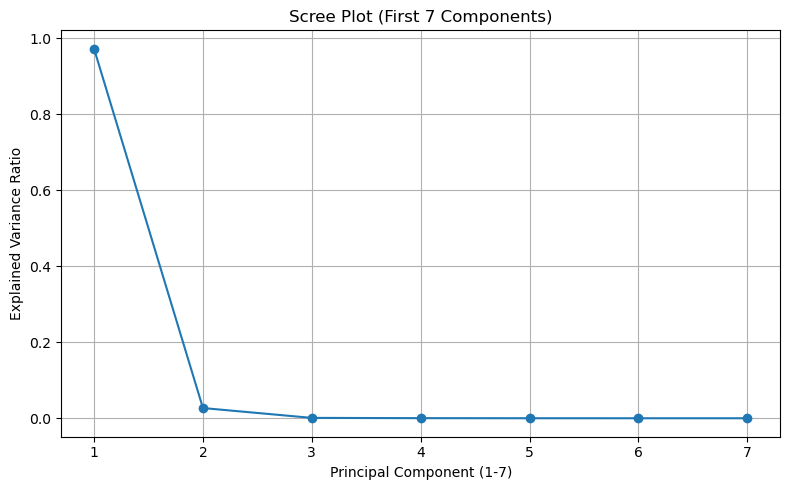

In [110]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# 1. Select only numeric columns and drop NaNs
X = data_pca.select_dtypes(include=[np.number]).dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA and limit to 7 components
pca = PCA(n_components=7)
pca.fit(X_scaled)

# 4. Explained variance for first 7 components
explained_variance = pca.explained_variance_ratio_

# 5. Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 8), explained_variance, marker='o', linestyle='-')
plt.xlabel('Principal Component (1-7)')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (First 7 Components)')
plt.grid(True)
plt.tight_layout()
plt.show()



## PCA with 3 components

In [111]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Select numeric columns and drop NaNs
X = data_pca.select_dtypes(include='number').dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# 4. (Optional) Inspect shape and explained variance
print("Shape of PCA output:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Shape of PCA output: (10073, 3)
Explained variance ratio: [9.71920142e-01 2.68402073e-02 9.48003073e-04]


In [112]:
# Each row corresponds to a principal component
# Each column corresponds to the original feature
print("PCA Components (loadings):")
print(pca.components_)


PCA Components (loadings):
[[ 0.20781566  0.21520252  0.21987041  0.22287819  0.22477554  0.22589578
   0.22647056  0.22667124  0.22662611  0.22642988  0.22615046  0.22583459
   0.22551269  0.22520293  0.22491455  0.22465046  0.22440924  0.22418668
   0.22397691  0.22377313]
 [ 0.53457947  0.42962807  0.333493    0.24833791  0.17359171  0.10853609
   0.0524047   0.00436546 -0.0364496  -0.07090949 -0.09984518 -0.12402723
  -0.14415052 -0.16083108 -0.17460565 -0.18593744 -0.19522326 -0.20279966
  -0.20895121 -0.21391796]
 [ 0.58122441  0.16220575 -0.08340882 -0.21934016 -0.28284171 -0.29778643
  -0.28070279 -0.24339655 -0.1943536  -0.13962499 -0.0834631  -0.02879025
   0.02244109  0.06900294  0.11017061  0.14559121  0.17516399  0.19897046
   0.21720987  0.23015998]]


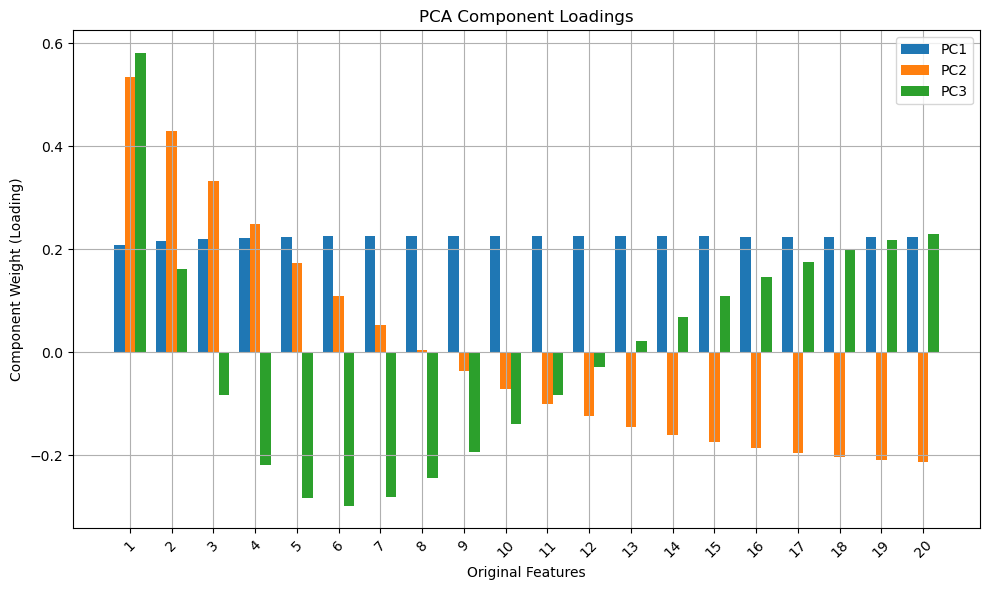

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names
feature_names = data_pca.select_dtypes(include='number').columns

# Create a DataFrame of the PCA components
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3'])

# Plot each component's loadings
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.bar(np.arange(len(feature_names)) + i*0.25, components_df.iloc[i], width=0.25, label=f'PC{i+1}')

# Formatting
plt.xticks(np.arange(len(feature_names)) + 0.25, feature_names, rotation=45)
plt.xlabel('Original Features')
plt.ylabel('Component Weight (Loading)')
plt.title('PCA Component Loadings')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


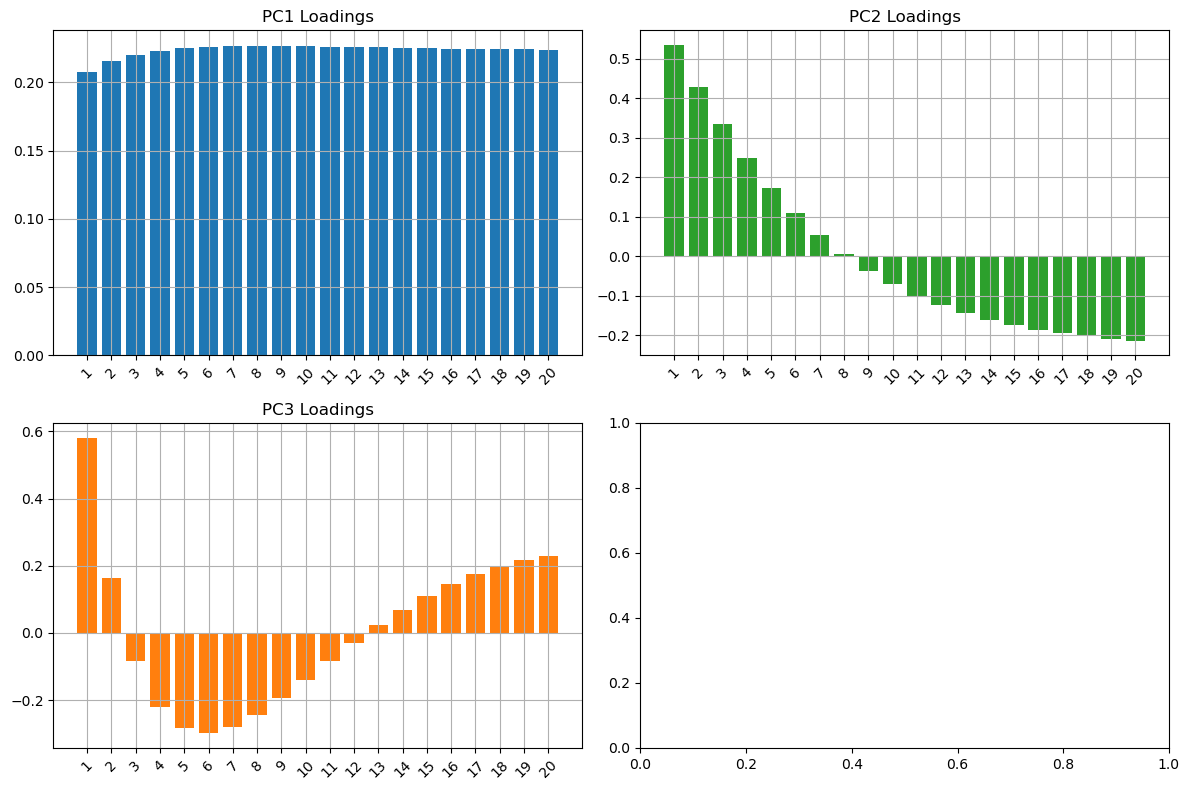

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature names and PCA components as a DataFrame
feature_names = data_pca.select_dtypes(include='number').columns
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3'])

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot PC1 (top left)
axs[0, 0].bar(feature_names, components_df.loc['PC1'], color='tab:blue')
axs[0, 0].set_title('PC1 Loadings')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plot PC2 (top right)
axs[0, 1].bar(feature_names, components_df.loc['PC2'], color='tab:green')
axs[0, 1].set_title('PC2 Loadings')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plot PC3 (bottom left)
axs[1, 0].bar(feature_names, components_df.loc['PC3'], color='tab:orange')
axs[1, 0].set_title('PC3 Loadings')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

## PCA with 4 components

In [115]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Select numeric columns and drop NaNs
X = data_pca.select_dtypes(include='number').dropna()

# 2. Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# 3. Fit PCA with 3 components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# 4. (Optional) Inspect shape and explained variance
print("Shape of PCA output:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Shape of PCA output: (10073, 4)
Explained variance ratio: [9.71920142e-01 2.68402073e-02 9.48003073e-04 2.51365424e-04]


In [116]:
# Each row corresponds to a principal component
# Each column corresponds to the original feature
print("PCA Components (loadings):")
print(pca.components_)


PCA Components (loadings):
[[ 0.20781566  0.21520252  0.21987041  0.22287819  0.22477554  0.22589578
   0.22647056  0.22667124  0.22662611  0.22642988  0.22615046  0.22583459
   0.22551269  0.22520293  0.22491455  0.22465046  0.22440924  0.22418668
   0.22397691  0.22377313]
 [ 0.53457947  0.42962807  0.333493    0.24833791  0.17359171  0.10853609
   0.0524047   0.00436546 -0.0364496  -0.07090949 -0.09984518 -0.12402723
  -0.14415052 -0.16083108 -0.17460565 -0.18593744 -0.19522326 -0.20279966
  -0.20895121 -0.21391796]
 [ 0.58122441  0.16220575 -0.08340882 -0.21934016 -0.28284171 -0.29778643
  -0.28070279 -0.24339655 -0.1943536  -0.13962499 -0.0834631  -0.02879025
   0.02244109  0.06900294  0.11017061  0.14559121  0.17516399  0.19897046
   0.21720987  0.23015998]
 [-0.33847372  0.09971218  0.26652469  0.2714737   0.19343685  0.08254604
  -0.03070241 -0.12877415 -0.20257298 -0.24838    -0.26580128 -0.25640695
  -0.22279283 -0.16803953 -0.09531669 -0.00768995  0.0920016   0.20119539
   0

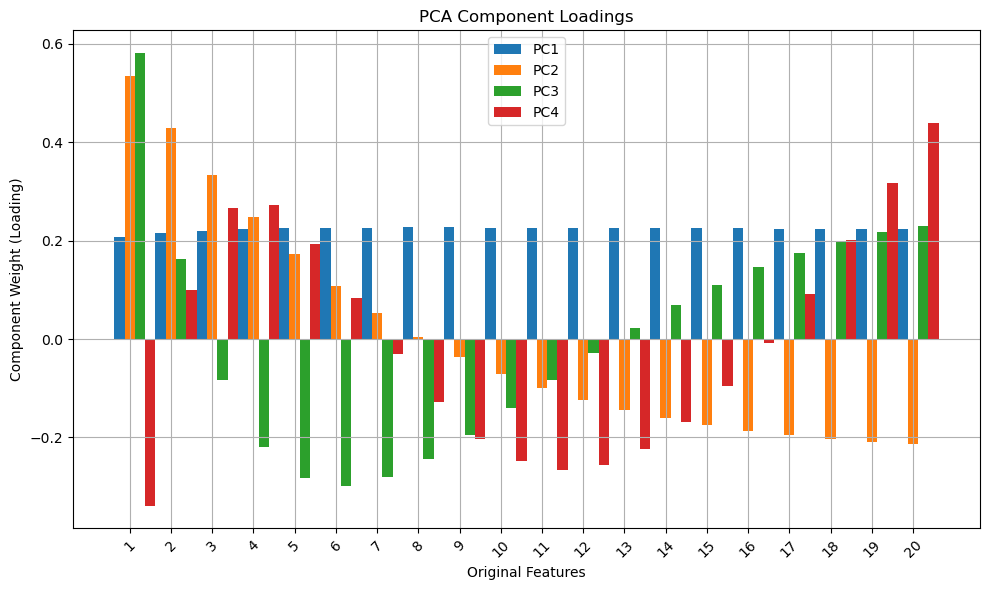

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names
feature_names = data_pca.select_dtypes(include='number').columns

# Create a DataFrame of the PCA components
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3', 'PC4'])

# Plot each component's loadings
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.bar(np.arange(len(feature_names)) + i*0.25, components_df.iloc[i], width=0.25, label=f'PC{i+1}')

# Formatting
plt.xticks(np.arange(len(feature_names)) + 0.25, feature_names, rotation=45)
plt.xlabel('Original Features')
plt.ylabel('Component Weight (Loading)')
plt.title('PCA Component Loadings')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


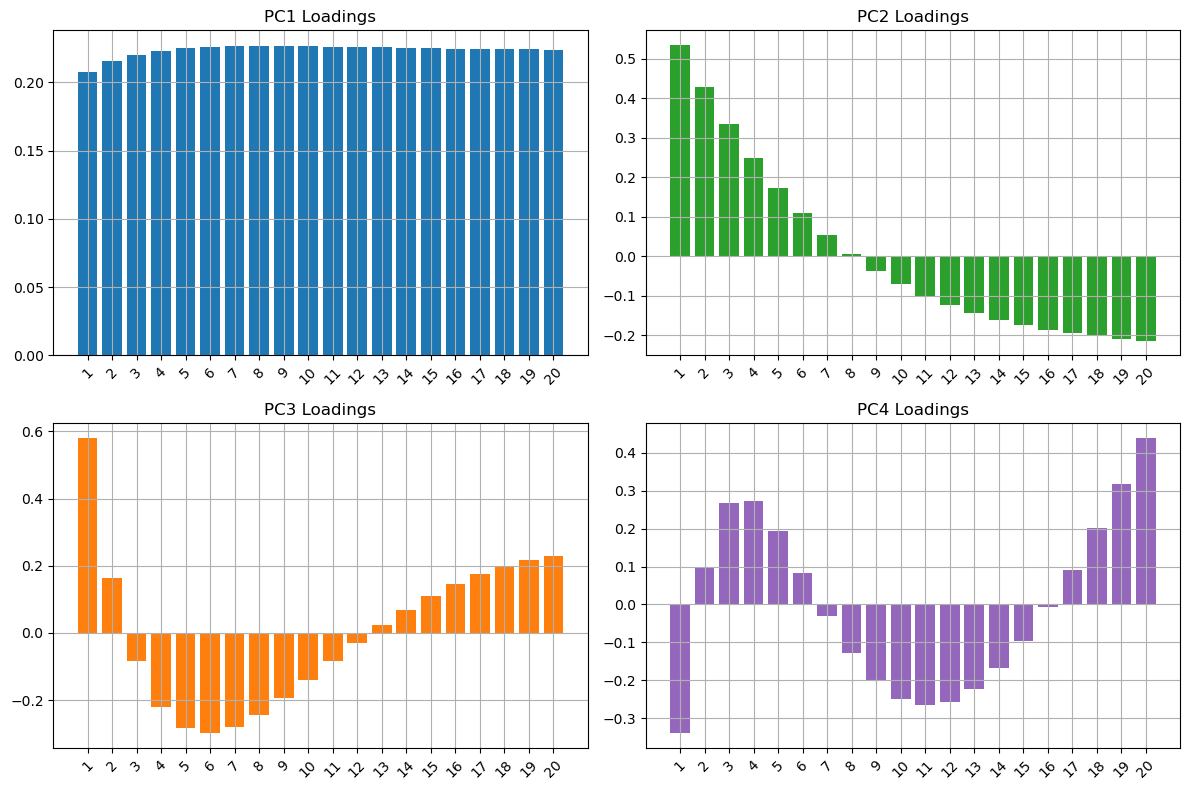

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature names and PCA components as a DataFrame
feature_names = data_pca.select_dtypes(include='number').columns
components_df = pd.DataFrame(pca.components_, columns=feature_names, index=['PC1', 'PC2', 'PC3', 'PC4'])

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot PC1 (top left)
axs[0, 0].bar(feature_names, components_df.loc['PC1'], color='tab:blue')
axs[0, 0].set_title('PC1 Loadings')
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(True)

# Plot PC2 (top right)
axs[0, 1].bar(feature_names, components_df.loc['PC2'], color='tab:green')
axs[0, 1].set_title('PC2 Loadings')
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(True)

# Plot PC3 (bottom left)
axs[1, 0].bar(feature_names, components_df.loc['PC3'], color='tab:orange')
axs[1, 0].set_title('PC3 Loadings')
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(True)

# Plot PC4 (bottom left)
axs[1, 1].bar(feature_names, components_df.loc['PC4'], color='tab:purple')
axs[1, 1].set_title('PC4 Loadings')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
